# DATA 606 Project - Analysis of Uber & Lyft ride details


* We've all experienced those moments when we open the Uber or Lyft app and wonder why the ride prices seem to be all over the place. Well, it turns out that it's not just random. Those prices can change because of a lot of factors, and one of those factors is the weather.

* Think about it - when it's pouring rain, everyone wants to get a ride rather than getting soaked. Or on a super hot day, you might prefer to avoid walking in the scorching sun. These weather conditions can make ride-hailing services like Uber and Lyft busier, and when there's high demand, they often increase their prices. That's what they call "surge pricing."

* But there's more to it than just that. Different types of weather can also affect how long your ride takes or the route your driver takes. All of these things can add up and influence how much you pay for your ride.

* So, here's the deal: we've got a bunch of data that tells us all about rides, prices, and the weather. We're going to dig into this data to find out how the weather and ride prices are connected.

### This analysis is about understanding dynamic pricing on level one difficulty ( like the first parameter as weather ). I think this model is a feedback mechanism to dynamic pricing and understanding these models will help to broaden the view of real case scenarios.

## About the data



* For this analysis, I am taking a dataset from Kaggle. This is a very beginner-friendly dataset. It does contain a lot of NA values. It is a good dataset if you want to use machine learning models and understand real-world data.

* It provides some important trip details and the corresponding weather at that time, I believe the weather will affect the trip prices, you can know more about the details of every column in further notes and I feel this analysis is a level one difficulty with only weather data. More factors will affect the price like driver ratings, user ratings, increase in gas prices, and more.

* you can find the data set here - https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma

# Analysing Uber and lyft ride costs and visualizations


* I am reading the file from the drive, the size of this data set is around 300 MB. About reading file this way looks easy and good for me, I don't need to upload every time.
* if you are reading a file from local storage, then you need to change the file path as you have while reading the file and you can comment out the first line ( This one - from google.colab import drive
.mount('/content/drive') ).

## Importing required libraries and trip details.
* Main objectives of this section is to import required libraries and reading data using pandas
* Here I used drive to access data, after reading I observed number of columns and their names and data types.

In [ ]:
# For accessing file from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing usseful librabry
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt

In [ ]:
# Reading the data as pandas data drame
df = pd.read_csv("/content/drive/MyDrive/rideshare_kaggle.csv")

In [ ]:
# First 5 rows of dataframe
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [ ]:
# Observing null values,data types, column names and total entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

* we can observe, there are different datatypes.
* like integers, floates, and Objects.
* By observing datetime variable, it is in objective data type. For usage of different cases we need to change this to datatime data type. That way we can use this data more flexible and month is important role in my study due to weather chnages in months.

## Basic sanity checks.
* Duplicate values checking, null values checking and datatypes change to usable format, these two are key for most of cases.

In [ ]:
# Cehcking duplicate values
df[df.duplicated()]

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime


* Here we can observe, there are no duplicates in data

In [ ]:
# Checking for null values in data
print(df.isnull().sum())

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

* There are some null values in prices, this might be caused by cancellation of rides.

In [ ]:
# Removing null valued rowes in dataframe
df=df.dropna()

In [ ]:
# Changing the datatype of column "datetime" from object to datetime
df['datetime']= pd.to_datetime(df['datetime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           637976 non-null  object        
 1   timestamp                    637976 non-null  float64       
 2   hour                         637976 non-null  int64         
 3   day                          637976 non-null  int64         
 4   month                        637976 non-null  int64         
 5   datetime                     637976 non-null  datetime64[ns]
 6   timezone                     637976 non-null  object        
 7   source                       637976 non-null  object        
 8   destination                  637976 non-null  object        
 9   cab_type                     637976 non-null  object        
 10  product_id                   637976 non-null  object        
 11  name                      

* As mentioned above, null values removed from data, checking of duplicates result zero. and datetime data type is chnages from objective to datetime.
* In upcoming stages we are going to check about distributions and important study about data.

## Understanding range and distributions of data [EDA]
* Key observations I like to do in this section is about data distributions.
* Important visuavalizations like main variables or probable variables.
* IMportance of this section is to familiar with data and make important plots for main goal

In [ ]:
# Shape of dataframe
df.shape

(637976, 57)

In [ ]:
# Available trip starting date
df['datetime'].min()

Timestamp('2018-11-26 03:40:46')

In [ ]:
# Available trip ending date
df['datetime'].max()

Timestamp('2018-12-18 19:15:10')

In [ ]:
# Observing the data, checking minimum, maximum values, and average values.
print(df.describe())

          timestamp           hour            day          month  \
count  6.379760e+05  637976.000000  637976.000000  637976.000000   
mean   1.544046e+09      11.618528      17.797674      11.586550   
std    6.892028e+05       6.948776       9.982083       0.492452   
min    1.543204e+09       0.000000       1.000000      11.000000   
25%    1.543444e+09       6.000000      13.000000      11.000000   
50%    1.543737e+09      12.000000      17.000000      12.000000   
75%    1.544828e+09      18.000000      28.000000      12.000000   
max    1.545161e+09      23.000000      30.000000      12.000000   

               price       distance  surge_multiplier       latitude  \
count  637976.000000  637976.000000     637976.000000  637976.000000   
mean       16.545125       2.189261          1.015068      42.338161   
std         9.324359       1.135413          0.095422       0.047856   
min         2.500000       0.020000          1.000000      42.214800   
25%         9.000000       

array([[<Axes: title={'center': 'timestamp'}>,
        <Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'distance'}>,
        <Axes: title={'center': 'surge_multiplier'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'apparentTemperature'}>],
       [<Axes: title={'center': 'precipIntensity'}>,
        <Axes: title={'center': 'precipProbability'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windSpeed'}>],
       [<Axes: title={'center': 'windGust'}>,
        <Axes: title={'center': 'windGustTime'}>,
        <Axes: title={'center': 'visibility'}>,
        <Axes: title={'center': 'temperatureHigh'}>],
       [<Axes: title={'center': 'tem

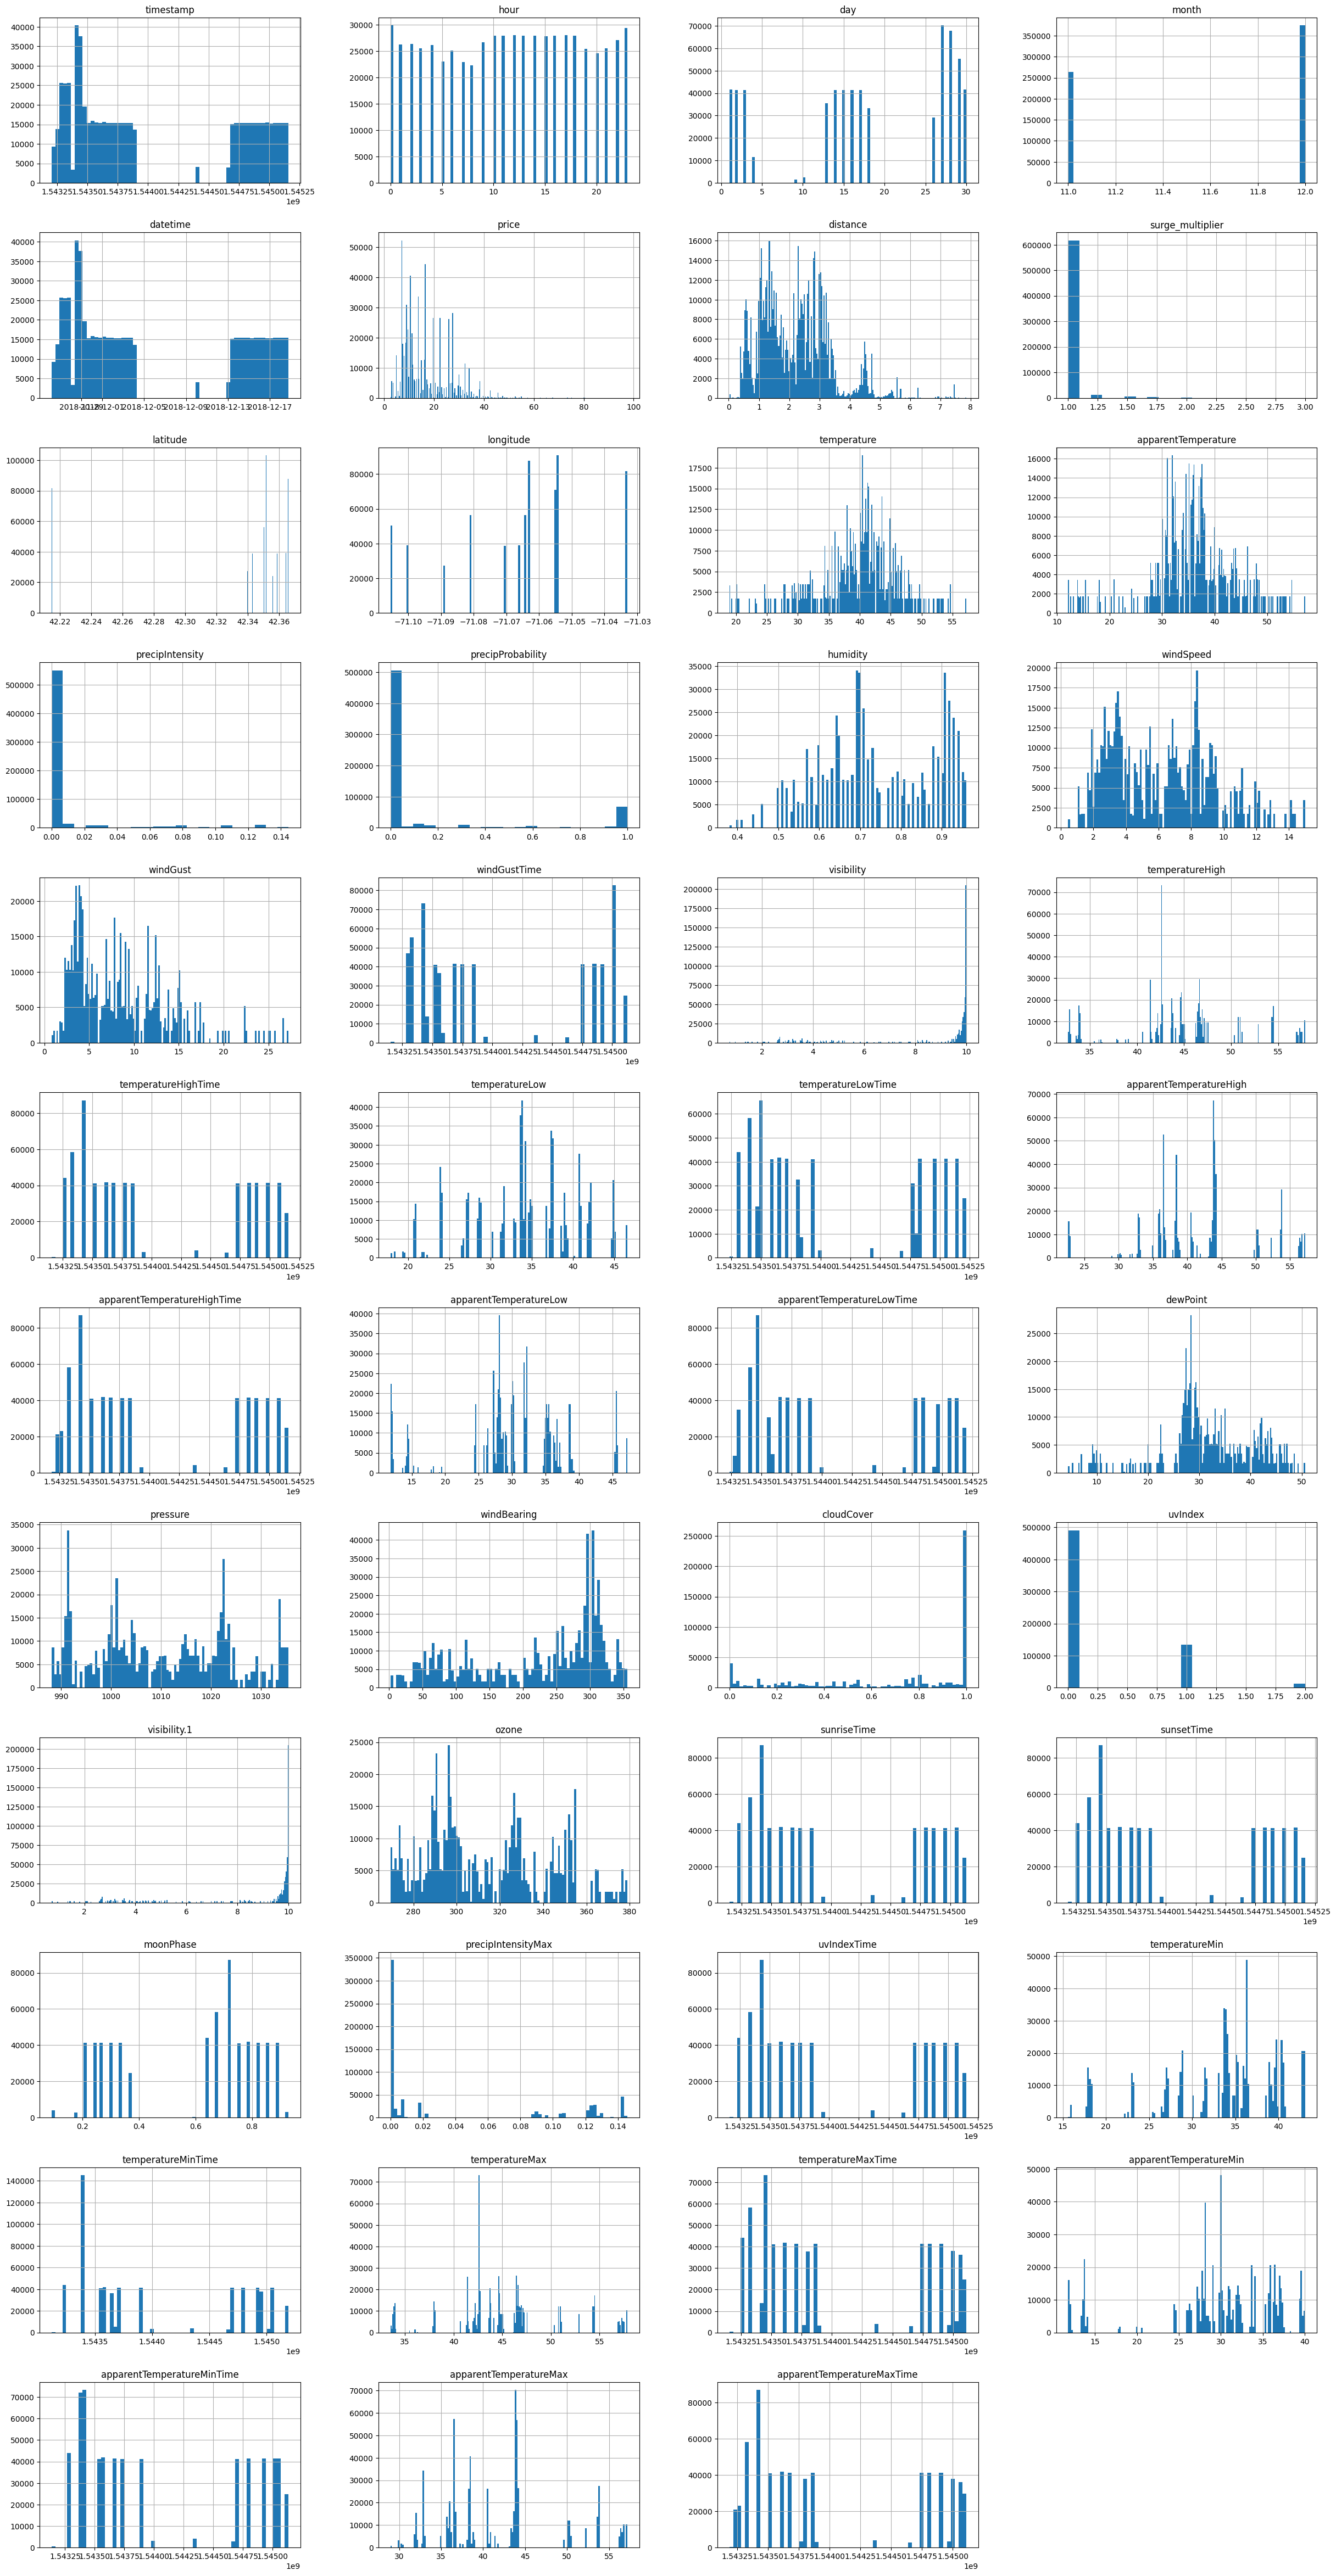

In [ ]:
# Instances ditribution of numaric values in data
df.hist(bins='auto', layout=(14,4), figsize=(30,70))

In [ ]:
# Creating function for the plots to get basic information and distributions in ploty express
def bar_plot(variable):
    df1 =df.groupby(variable).size().reset_index(name="counts")
    fig = px.bar(data_frame=df1, x=variable, y="counts", color=variable, barmode="group")
    fig.show()

In [ ]:
# we observed, the data is distruted from 2018-11-26 to 2018-12-18
# data distribution amoung months
bar_plot('month')

* We can see more trip detils form december, not big difference particularly but more are from month 12. Lets check in dates

In [ ]:
# To check distribution among dates from available window of available dates
bar_plot('day')

* we can see no rides in some dates, even with having aroound 20 days of data with 600K instances. For particular day we can check in above graph, it is intractive.

In [ ]:
# Total number of rides among hours.
bar_plot('hour')

* data is well distributed, over all it looks more balances among hours.

In [ ]:
df1= df[['source', 'destination', 'cab_type','name','short_summary','long_summary']]
df1.describe()

,source,destination,cab_type,name,short_summary,long_summary
count,637976,637976,637976,637976,637976,637976
unique,12,12,2,12,9,11
top,Financial District,Financial District,Uber,UberXL,Overcast,Mostly cloudy throughout the day.
freq,54197,54192,330568,55096,201429,186262


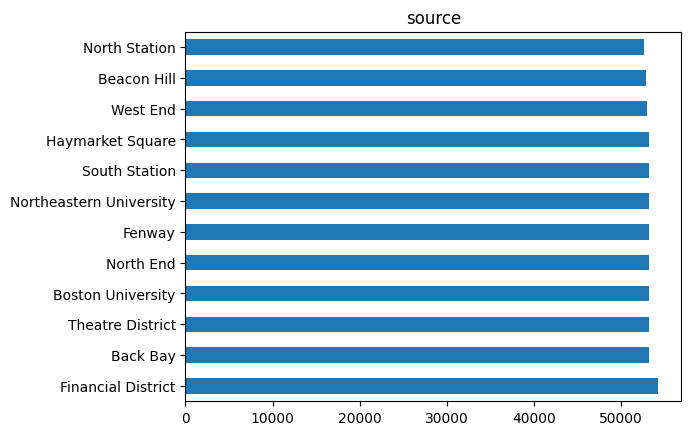

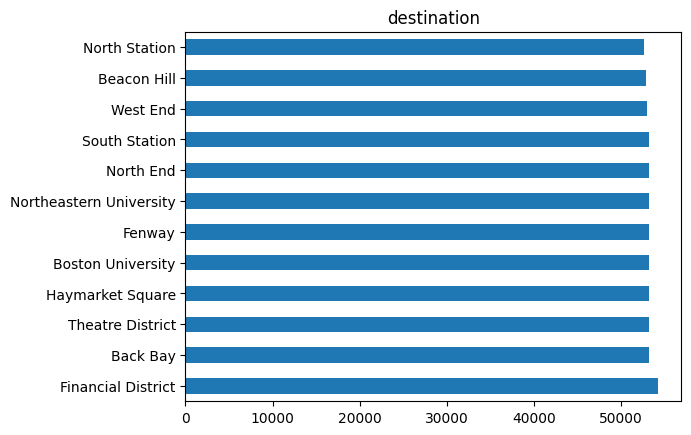

In [ ]:
df['source'].value_counts().plot(kind='barh')
plt.title('source')
plt.show()
df['destination'].value_counts().plot(kind='barh')
plt.title('destination')
plt.show()

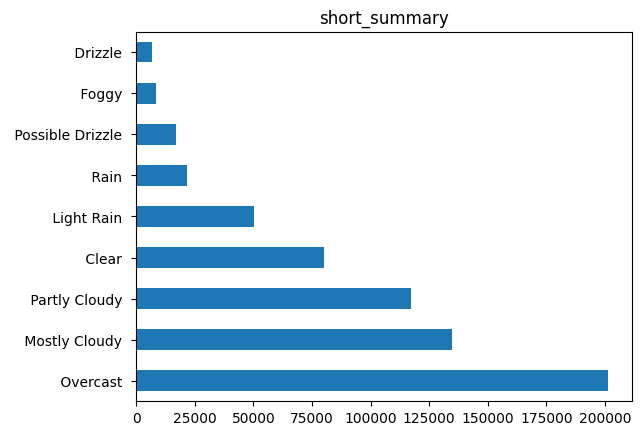

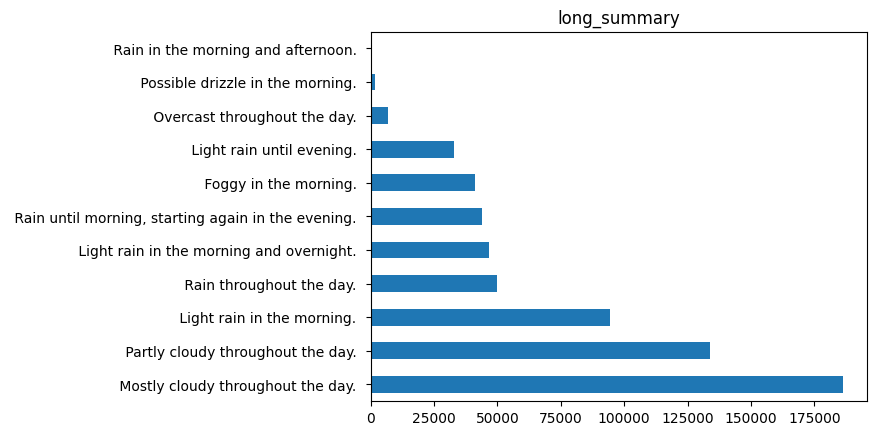

In [ ]:
df['short_summary'].value_counts().plot(kind='barh')
plt.title('short_summary')
plt.show()
df['long_summary'].value_counts().plot(kind='barh')
plt.title('long_summary')
plt.show()

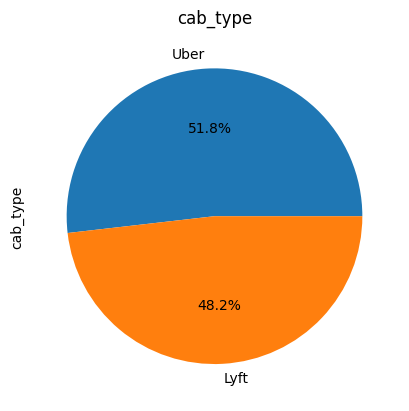

In [ ]:
df['cab_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('cab_type')
plt.show()

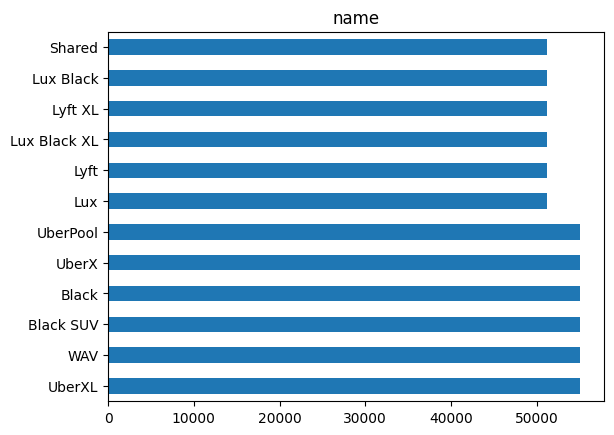

In [ ]:
df['name'].value_counts().plot(kind='barh')
plt.title('name')
plt.show()

### Key observations
* Data is well balanced, and we did observe there is an unbalance in weather situations like rain, fog, cloud, clear, and drizzles.
* Other than that everything looks good like trip distribution every day, and distribution among different vehicles in trips, Uber rides, and Lyft rides, and I did observe most of the trips from December even though trips are from only November and December.
* And another key thing is we have categorical and continuous variables in data. I am expecting some of these features as important. Cause, we can expect some of the features like different vehicles and available vehicles at that time(surgemultiplier), distance, weather type, and temperature.
* In these there are important categorical variables like cab type and weather type. And continuous like distance, temperature, and surgemultiplier. these all are very important.
* About pick location, I think as categorical for this data but in real time it is gonna be continuous if considered as numbers like pincodes and house numbers. I believe they take it as a house number with a PIN code.

## Ckeecking price concerning important aspects like weather situation and starting places.
* For my observations I use variables from price and distance, which results in price per mile. Observing this with weather and locations will give more edge to my goal.
* Here I like to observe price variations concerning Weather data and source (starting position) data.
* We might face even one or two times, too much prices in Uber or Lyft in bad weather situations like rain or fog. I think the weather will affect the price of the trip, so observing variations in these details will provide clarity and add a bonus to feature engineering or correlations.
* While booking from popular places like stations or airports we will be charged more than normal prices, we don't care about these cases due to our urgencies. I wanna explore this situation also. So I am checking price values concerning sources.

In [ ]:
# Adding new variable from two existing values
# Price per mile(PPM), it gives price paid by customer in each ride per each mile - Like standard measurement for observations.
df['PPM'] = df['price'].div(df['distance'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           637976 non-null  object        
 1   timestamp                    637976 non-null  float64       
 2   hour                         637976 non-null  int64         
 3   day                          637976 non-null  int64         
 4   month                        637976 non-null  int64         
 5   datetime                     637976 non-null  datetime64[ns]
 6   timezone                     637976 non-null  object        
 7   source                       637976 non-null  object        
 8   destination                  637976 non-null  object        
 9   cab_type                     637976 non-null  object        
 10  product_id                   637976 non-null  object        
 11  name                      

<Axes: title={'center': 'PPM Distribution'}, xlabel='Average of price per mile', ylabel='cab types'>

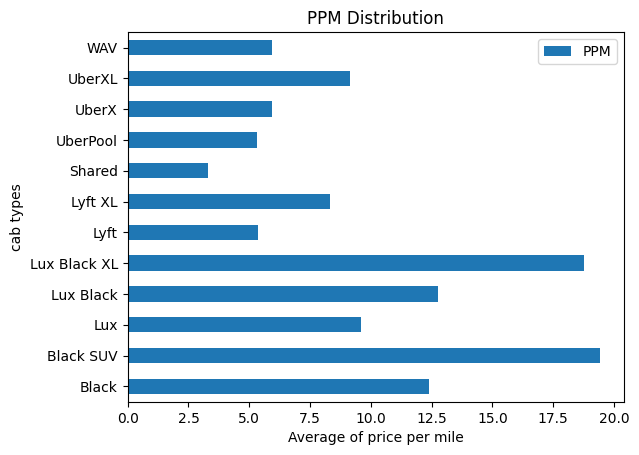

In [ ]:
# PPM with respect to cab types
df[['name', 'PPM']].groupby(['name']).mean(['PPM']).plot.barh(title = 'PPM Distribution',ylabel='cab types', xlabel='Average of price per mile')

In [ ]:
# PPM with respect to weather type
df[['name','short_summary','PPM']].groupby(['name','short_summary']).mean(['PPM'])

PPM
name  short_summary                
Black  Clear              12.333320
       Drizzle            12.588538
       Foggy              12.489938
       Light Rain         13.065320
       Mostly Cloudy      12.175287
...                             ...
WAV    Mostly Cloudy       5.876630
       Overcast            5.987330
       Partly Cloudy       5.937421
       Possible Drizzle    5.755613
       Rain                6.078991

[108 rows x 1 columns]

In [ ]:
# PPM with respect to starting locations(Source)
df[['name','source','PPM']].groupby(['name','source']).mean(['PPM'])

PPM
name  source                            
Black Back Bay                 12.256545
      Beacon Hill               9.999684
      Boston University        10.001740
      Fenway                    8.359789
      Financial District       14.843921
...                                  ...
WAV   North Station             5.856863
      Northeastern University   4.052954
      South Station             6.603881
      Theatre District          6.702703
      West End                  5.786083

[144 rows x 1 columns]

In [ ]:
# PPM with respect to starting locations(Source) and values count
df[['name','source','PPM']].groupby(['name','source']).agg({"PPM": [ 'count','mean']})

PPM           
                              count       mean
name  source                                  
Black Back Bay                 4591  12.256545
      Beacon Hill              4563   9.999684
      Boston University        4592  10.001740
      Fenway                   4591   8.359789
      Financial District       4660  14.843921
...                             ...        ...
WAV   North Station            4542   5.856863
      Northeastern University  4592   4.052954
      South Station            4590   6.603881
      Theatre District         4612   6.702703
      West End                 4582   5.786083

[144 rows x 2 columns]

In [ ]:
df = df.drop(['PPM'], axis=1)

### Observations
* In first step I added variable(price per mile(ppm)) to dataframe.
* Then we can observe clearly, that there is a class difference in vehicles like luxury and comfort provided by vehicle. It started with sharing luxury vehicles. This clears that cab type going to be one of the key features while predicting price.
* After that we observed ppm concerning weather types like rain, fog, clear, and more. we can see the price of UberX is different in each weather type, even though it is small changes in number, we need to understand terms more here, like ppm is the price per single mile and that particular value is the mean of each weather type.
* While dealing with means, even small changes result in big changes. we can see in foggy conditions UberX value is more compared with other conditions which means Uber considers driving conditions concerning weather. Like driving in foggy weather is tough and driver availability is also less, we need to take that into account.
* Later I followed the same with Location. we can observe the same with locations also, from stations results more compared to normal values.
* These conclude my interest in this step as follows, From the above results I conclude prices are higher in bad weather or busy locations, it might be from available drivers or to manage supply-demand or bad weather.

## Preparations for mahcine learning
* subseting data based in weather balance - weather data is affecting price, so I am giving balanced state to model for better accuracies and even to work noraml in extreme weather conditions.
* correaltion ammong numarics variables to target variable
* Feature engineering

In [ ]:
# subseting data based in weather balance
num_instances_per_short_summary_classe = 6000
df_temp = []

for classe in df['short_summary'].unique():
    temp = df[df['short_summary'] == classe].sample(n=num_instances_per_short_summary_classe,random_state=42)
    df_temp.append(temp)

df_small = pd.concat(df_temp, axis=0)
print('-'*60)
print('#instances per short summery class')
print(df_small['short_summary'].value_counts())
print('-'*60)
df_small.info()

------------------------------------------------------------
#instances per short summery class
 Mostly Cloudy        6000
 Rain                 6000
 Clear                6000
 Partly Cloudy        6000
 Overcast             6000
 Light Rain           6000
 Foggy                6000
 Possible Drizzle     6000
 Drizzle              6000
Name: short_summary, dtype: int64
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 54000 entries, 454724 to 51048
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           54000 non-null  object        
 1   timestamp                    54000 non-null  float64       
 2   hour                         54000 non-null  int64         
 3   day                          54000 non-null  int64         
 4   month                        54000 non-null  int64       

In [ ]:
# Correlation
co_relation = df_small.corr()
co_relation

<ipython-input-35-0c732223a497>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.000000,-0.030454,-0.340681,0.781631,-0.008009,-0.001170,-0.005407,0.175932,-0.061131,-0.350772,...,-0.406287,0.999329,-0.364661,0.998154,-0.321750,0.999271,-0.460080,0.998573,-0.342273,0.999240
hour,-0.030454,1.000000,-0.039984,-0.008797,0.000651,0.006124,0.000331,0.034918,-0.060206,0.176416,...,0.010193,-0.031417,-0.095494,-0.034264,0.001712,-0.030882,-0.044248,-0.036499,0.029968,-0.030610
day,-0.340681,-0.039984,1.000000,-0.852459,0.004766,0.010083,0.005377,-0.009954,0.175953,-0.096684,...,0.330459,-0.344153,0.017567,-0.342058,-0.400466,-0.347802,-0.052925,-0.337760,-0.475512,-0.348267
month,0.781631,-0.008797,-0.852459,1.000000,-0.007619,-0.007458,-0.006577,0.103568,-0.149652,-0.133638,...,-0.445065,0.783583,-0.212217,0.781593,0.087450,0.785965,-0.219283,0.779012,0.125390,0.786251
price,-0.008009,0.000651,0.004766,-0.007619,1.000000,0.345565,0.247058,0.007645,-0.005664,0.001443,...,0.010421,-0.008052,-0.000023,-0.008022,0.002586,-0.008065,0.002550,-0.007826,0.003741,-0.008138
distance,-0.001170,0.006124,0.010083,-0.007458,0.345565,1.000000,0.025084,-0.000895,-0.001387,-0.003462,...,0.004986,-0.001462,-0.004699,-0.001755,-0.006851,-0.001400,-0.003199,-0.001440,-0.006273,-0.001404
surge_multiplier,-0.005407,0.000331,0.005377,-0.006577,0.247058,0.025084,1.000000,0.000426,-0.000754,0.004035,...,0.005777,-0.005430,0.000333,-0.005199,0.002335,-0.005523,0.000337,-0.005410,0.001845,-0.005510
latitude,0.175932,0.034918,-0.009954,0.103568,0.007645,-0.000895,0.000426,1.000000,-0.558894,-0.138939,...,-0.102670,0.182540,-0.105647,0.183889,-0.118483,0.184092,-0.094900,0.183117,-0.093524,0.182066
longitude,-0.061131,-0.060206,0.175953,-0.149652,-0.005664,-0.001387,-0.000754,-0.558894,1.000000,-0.037061,...,0.110259,-0.065060,-0.063822,-0.072104,-0.149201,-0.065376,-0.104337,-0.071672,-0.165862,-0.064290
temperature,-0.350772,0.176416,-0.096684,-0.133638,0.001443,-0.003462,0.004035,-0.138939,-0.037061,1.000000,...,0.397407,-0.354031,0.781946,-0.345302,0.752995,-0.353933,0.816581,-0.336212,0.689884,-0.355219


In [ ]:
co_relation['price'].sort_values(ascending=False)

price                          1.000000
distance                       0.345565
surge_multiplier               0.247058
apparentTemperatureLow         0.012289
temperatureLow                 0.010579
precipIntensityMax             0.010421
latitude                       0.007645
pressure                       0.005753
day                            0.004766
precipIntensity                0.004235
apparentTemperatureHigh        0.003824
apparentTemperatureMax         0.003741
apparentTemperature            0.002912
precipProbability              0.002855
temperatureHigh                0.002743
temperatureMax                 0.002586
apparentTemperatureMin         0.002550
humidity                       0.002396
dewPoint                       0.002128
temperature                    0.001443
hour                           0.000651
cloudCover                     0.000362
uvIndex                        0.000020
temperatureMin                -0.000023
moonPhase                     -0.001328


In [ ]:
co_relation[co_relation['price'] > 0.01 ]['price'].sort_values(ascending=False)

price                     1.000000
distance                  0.345565
surge_multiplier          0.247058
apparentTemperatureLow    0.012289
temperatureLow            0.010579
precipIntensityMax        0.010421
Name: price, dtype: float64

* Even from correlation also we can observe, low temparature as important feature. Location is from boston and data is in november and december months so we can expect low temparatures.

## Later stages are Feature engineering, Model tunning, Using Streamlit and wroking on improving effectiveness of notebook and runtime.